In [1]:
import numpy as np
np.__version__

'1.21.5'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.__version__

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'0.13.2'

In [29]:
data = np.load('data.npy')
data = data.T
x, y, density = data[:,0],data[:,1],data[:,2]
R = 0.1
sigma = R/3
n, _ = data.shape
data.shape

(21483, 3)

In [ ]:
def filter(i):
    mask = (x[i]-R<=x) & (x<=x[i]+R) & (y[i]-R<=y) & (y<=y[i]+R)
    densityMasked = np.where(mask, density, 0)
    weight = np.exp(-((x-x[i])**2+(y-y[i])**2)/(2*sigma**2))
    weight = weight/weight.sum()
    return (densityMasked*weight).sum()

In [ ]:
f = np.vectorize(filter)
densityF = f(np.arange(n))

In [ ]:
d=np.array(density)

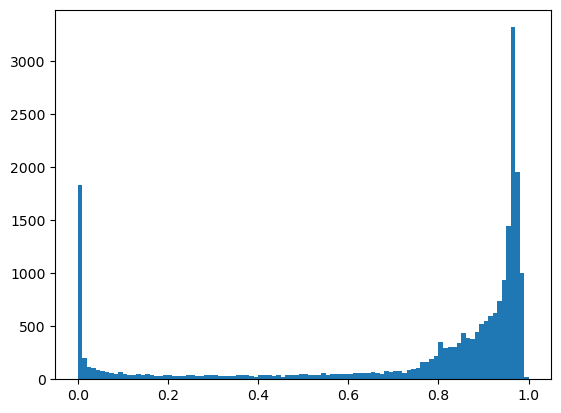

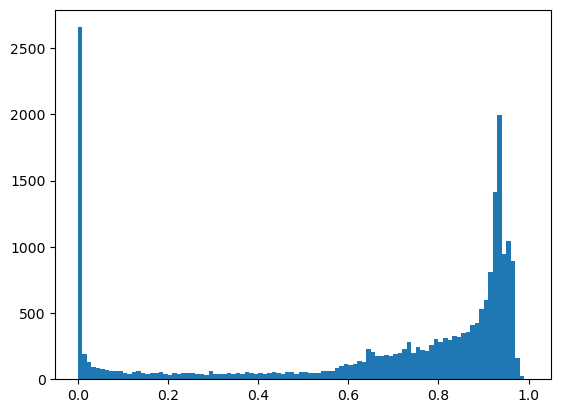

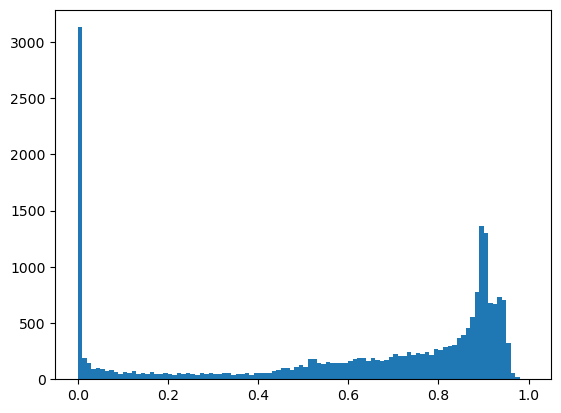

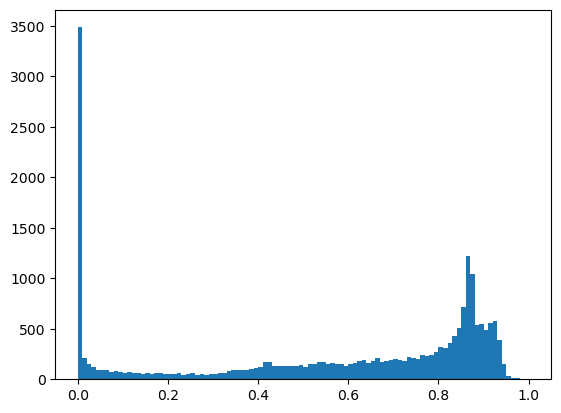

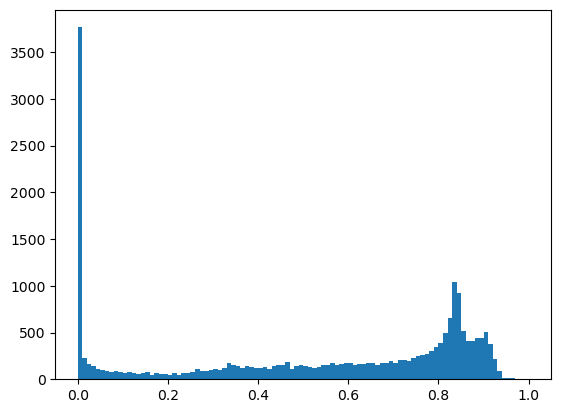

In [26]:
for i in range(1,6):
    plt.hist(density**i, bins=100,range=(0,1))
    plt.show()


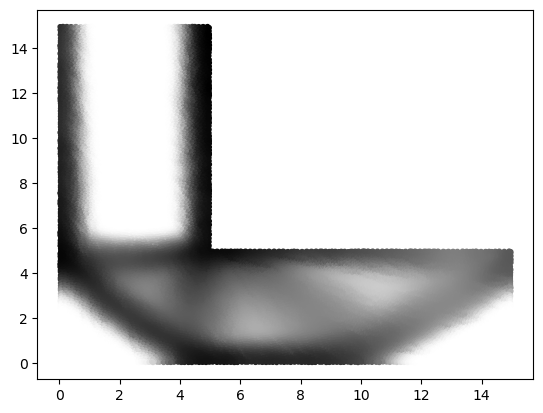

In [33]:
plt.scatter(x, y, c=(1-density), marker='.', cmap='gray')

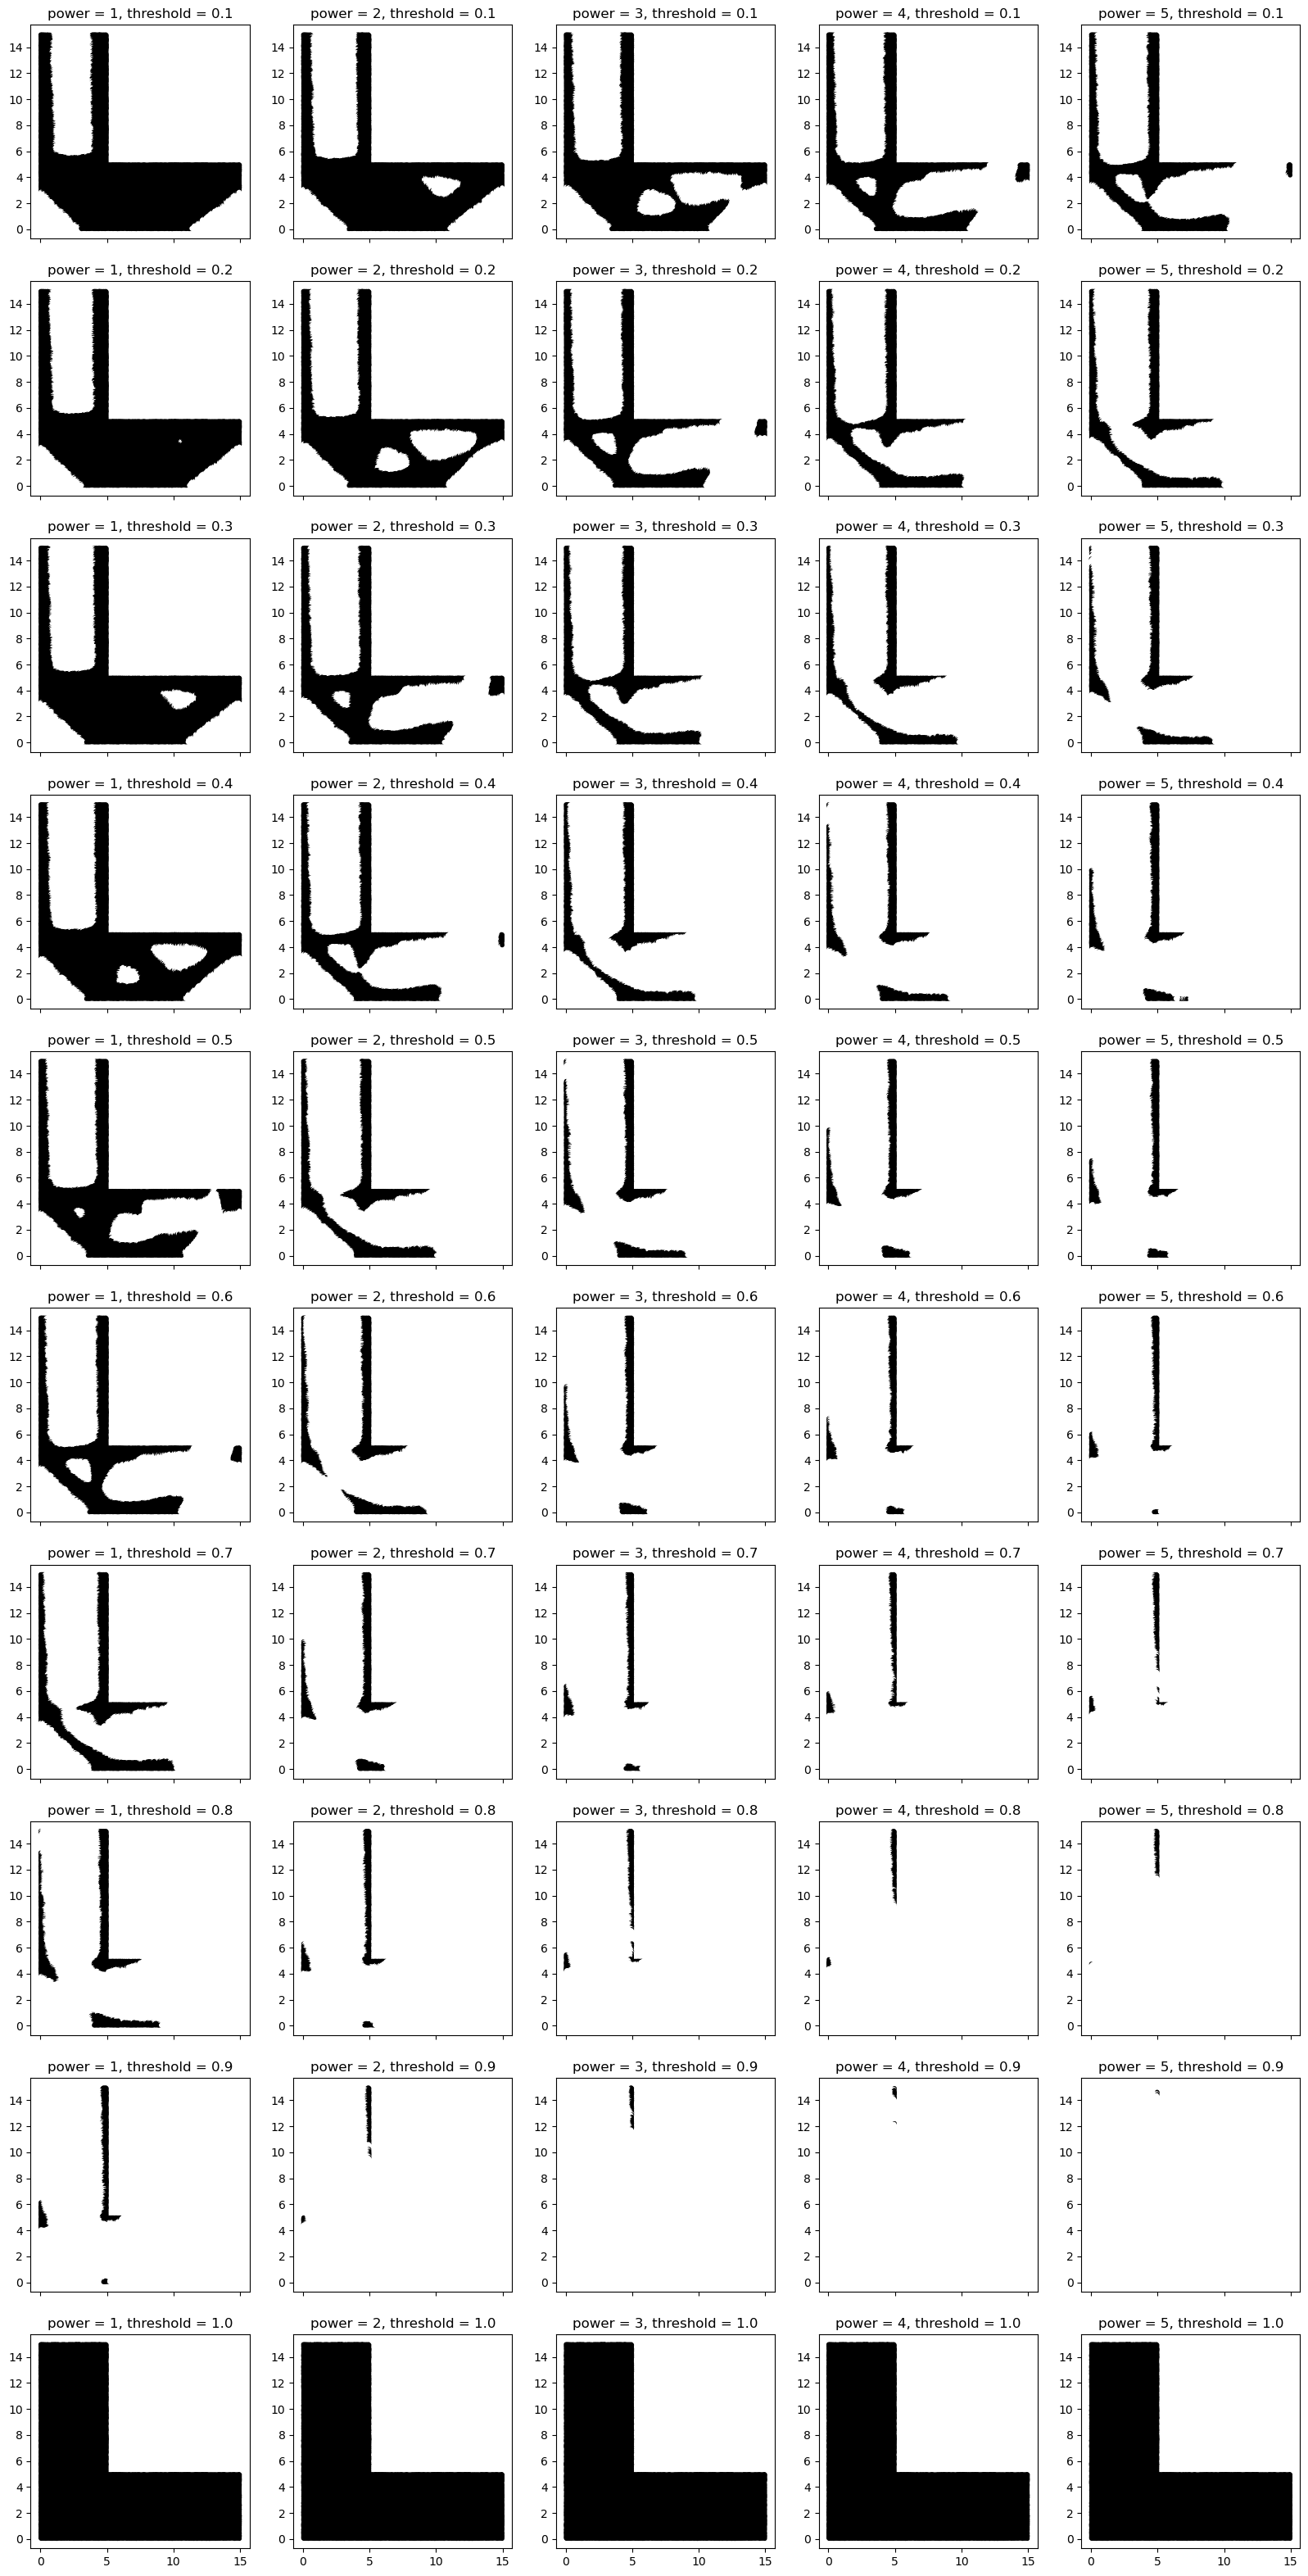

In [31]:
fig, axes = plt.subplots(10, 5, figsize=(20,40), sharex=True)
for p in range(1,6):
    for t in range(1,11):
        axes[t-1][p-1].scatter(x, y, c=(density**p)<t/10, marker='.', cmap='gray')
        axes[t-1][p-1].set_title(f'power = {p}, threshold = {t/10}')
plt.show()